# Model Validation in Python (Python)

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Model Validation in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# CHAPTER 1 - Basic Modeling in scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# CHAPTER 2 - Validation Basics
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score

# Chapter 3 - Cross Validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer

# Chapter 4 - Selecting the best model with Hyperparameter tuning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.externals import joblib


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Basic Modeling in scikit-learn



#### Exercício 1 - Introduction to Model Validation

In [5]:
#vídeo

Exercício 2

In [6]:
# Modeling steps

# Which of the following is NOT a valid method in the four-step scikit-learn model validation framework?
print('.validate()')
print("""\nValidation is a technique all in its own and is not completed with .validate(). You need to learn a few tools 
and techniques before you can validate a model.""")

.validate()

Validation is a technique all in its own and is not completed with .validate(). You need to learn a few tools 
and techniques before you can validate a model.


Exercício 3

In [7]:
# Seen vs. unseen data

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv(data_folder + "candy-data.csv")
X = df.drop(['winpercent', 'competitorname'], axis=1)
y = df['winpercent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1111)

model = RandomForestRegressor(random_state=1111)

##############################################################################################################333

# The model is fit using X_train and y_train
model.fit(X_train, y_train)

# Create vectors of predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Train/Test Errors
train_error = mae(y_true=y_train, y_pred=train_predictions)
test_error = mae(y_true=y_test, y_pred=test_predictions)

# Print the accuracy for seen and unseen data
print("Model error on seen data: {0:.2f}.".format(train_error))
print("Model error on unseen data: {0:.2f}.".format(test_error))

print("""\nWhen models perform differently on training and testing data, you should look to model validation to ensure you 
have the best performing model. In the next lesson, you will start building models to validate.""")

Model error on seen data: 3.43.
Model error on unseen data: 10.03.

When models perform differently on training and testing data, you should look to model validation to ensure you 
have the best performing model. In the next lesson, you will start building models to validate.


#### Exercício 4 - Regression models

In [8]:
#vídeo

Exercício 5

In [9]:
# Set parameters and fit a model

rfr = RandomForestRegressor(random_state=1111)

# Set the number of trees
rfr.n_estimators = 100

# Add a maximum depth
rfr.max_depth = 6

# Set the random state
rfr.random_state = 1111

# Fit the model
rfr.fit(X_train, y_train)

print("""You have updated parameters after the model was initialized. This approach is helpful when you need to update 
parameters. Before making predictions, let's see which candy characteristics were most important to the model.""")

rfr

You have updated parameters after the model was initialized. This approach is helpful when you need to update 
parameters. Before making predictions, let's see which candy characteristics were most important to the model.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1111, verbose=0, warm_start=False)

Exercício 6

In [10]:
# Feature importances

# Fit the model using X and y
rfr.fit(X_train, y_train)

# Print how important each column is to the model
for i, item in enumerate(rfr.feature_importances_):
      # Use i and item to print out the feature importance of each column
    print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

print("""\nNo surprise here - chocolate is the most important variable. 
.feature_importances_ is a great way to see which variables were important to your random forest model.""")

chocolate: 0.47
fruity: 0.03
caramel: 0.01
peanutyalmondy: 0.08
nougat: 0.00
crispedricewafer: 0.02
hard: 0.01
bar: 0.01
pluribus: 0.02
sugarpercent: 0.19
pricepercent: 0.16

No surprise here - chocolate is the most important variable. 
.feature_importances_ is a great way to see which variables were important to your random forest model.


#### Exercício 7 - Classification models

In [11]:
#vídeo

Exercício 8

In [12]:
# Classification predictions

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(data_folder + "tic-tac-toe.csv")

for i in df.columns:
    df[i] = LabelEncoder().fit_transform(df[i])

X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1111)

rfc = RandomForestClassifier(random_state=1111)

#########################################################################################################

# Fit the rfc model. 
rfc.fit(X_train, y_train)

# Create arrays of predictions
classification_predictions = rfc.predict(X_test)
probability_predictions = rfc.predict_proba(X_test)

# Print out count of binary predictions
print(pd.Series(classification_predictions).value_counts())

# Print the first value from probability_predictions
print('\nThe first predicted probabilities are: {}'.format(probability_predictions[0]))
print('The second predicted probabilities are: {}'.format(probability_predictions[1]))
print("...etc\n")

print("""You can see there were {} observations where Player One was predicted to win the Tic-Tac-Toe game. Also, note
that the predicted_probabilities array contains lists with only two values because you only have two possible responses 
(win or lose). """.format(pd.Series(classification_predictions).value_counts()[1]))

1    173
0     67
dtype: int64

The first predicted probabilities are: [0.2 0.8]
The second predicted probabilities are: [0.18 0.82]
...etc

You can see there were 173 observations where Player One was predicted to win the Tic-Tac-Toe game. Also, note
that the predicted_probabilities array contains lists with only two values because you only have two possible responses 
(win or lose). 


Exercício 9

In [13]:
# Reusing model parameters

rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

# Print the classification model
print(rfc)

# Print the classification model's random state parameter
print('\nThe random state is: {}'.format(rfc.random_state))

# Print all parameters
print('Printing the parameters dictionary: {}'.format(rfc.get_params()))

print("""\nRecalling which parameters were used will be helpful going forward. Model validation and performance rely heavily
on which parameters were used, and there is no way to replicate a model without keeping track of the parameters used.""")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

The random state is: 1111
Printing the parameters dictionary: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0

Exercício 10

In [14]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

# Fit rfc using X_train and y_train
rfc.fit(X_train, y_train)

# Create predictions on X_test
predictions = rfc.predict(X_test)
print(predictions[0:20])

# Print model accuracy using score() and the testing data
print("\nScore: ", rfc.score(X_test, y_test))

print("""\nNotice the first five predictions were all 1, indicating that Player One is predicted to win all five of those 
games. You also see the model accuracy was only 82%.
Let's move on to Chapter 2 and increase our model validation toolbox by learning about splitting datasets, standard 
accuracy metrics, and the bias-variance tradeoff.""")

[1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0]

Score:  0.8708333333333333

Notice the first five predictions were all 1, indicating that Player One is predicted to win all five of those 
games. You also see the model accuracy was only 82%.
Let's move on to Chapter 2 and increase our model validation toolbox by learning about splitting datasets, standard 
accuracy metrics, and the bias-variance tradeoff.


# CHAPTER 2 - Validation Basics

#### Exercício 1 - Create train, test and validation datasets

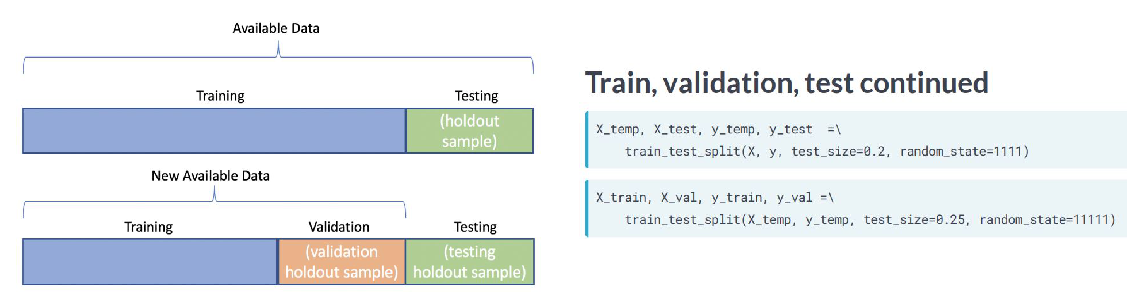

In [15]:
#vídeo
plot_2('training_validation_testing_data', 'train_test_validation_2', right=2.6, wspace=0.05)

Exercício 2

In [16]:
# Create one holdout set

tic_tac_toe = pd.read_csv(data_folder + "tic-tac-toe.csv")

# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:,0:9])
y = tic_tac_toe.iloc[:, 9]

# Create training and testing datasets. Use 10% for the test set
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.1, random_state=1111)

print("""Ok. Remember, without the holdout set, you cannot truly validate a model. Let's move on to creating two holdout 
sets.""")

Ok. Remember, without the holdout set, you cannot truly validate a model. Let's move on to creating two holdout 
sets.


Exercício 3

In [17]:
# Create two holdout sets

# Create temporary training and final testing datasets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Create the final training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1111)

print("""You now have training, validation, and testing datasets, but do you know WHEN do you need both validation and 
testing datasets? Keep going - The next exercise will help make sure you understand when to use validation datasets.""")

You now have training, validation, and testing datasets, but do you know WHEN do you need both validation and 
testing datasets? Keep going - The next exercise will help make sure you understand when to use validation datasets.


Exercício 4

In [18]:
# Why use holdout sets

# It is important to understand when you would use three datasets (training, validation, and testing) instead of two 
# (training and testing). There is no point in creating an additional dataset split if you are not going to use it.

# When should you consider using training, validation, and testing datasets?

print("""When testing parameters, tuning hyper-parameters, or anytime you are frequently evaluating model performance.""")

When testing parameters, tuning hyper-parameters, or anytime you are frequently evaluating model performance.


#### Exercício 5 - Accuracy metrics: regression models

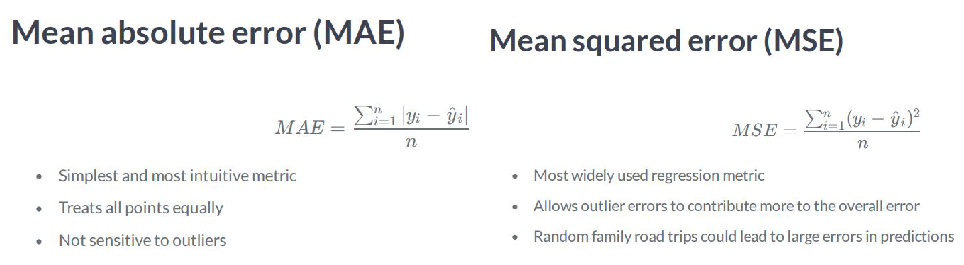

In [19]:
#vídeo

from sklearn.metrics import mean_absolute_error, mean_squared_error

plot_2('mae', 'mse')


Exercício 6

In [20]:
# Mean absolute error

df = pd.read_csv(data_folder + "candy-data.csv")
X = df.drop(['winpercent', 'competitorname'], axis=1)
y = df['winpercent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1111)
model = RandomForestRegressor(random_state=1111)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
##################################################################

from sklearn.metrics import mean_absolute_error

# Manually calculate the MAE
n = len(predictions)
mae_one = sum(abs(y_test - predictions)) / n
print('With a manual calculation, the error is {}'.format(mae_one))

# Use scikit-learn to calculate the MAE
mae_two = mean_absolute_error(predictions, y_test)
print('Using scikit-lean, the error is {}'.format(mae_two))

mae_one == mae_two  # ?

With a manual calculation, the error is 10.033477059243518
Using scikit-lean, the error is 10.033477059243516


False

Exercício 7

In [21]:
# Mean squared error

from sklearn.metrics import mean_squared_error

n = len(predictions)
# Finish the manual calculation of the MSE
mse_one = sum((y_test - predictions)**2) / n
print('With a manual calculation, the error is {}'.format(mse_one))

# Use the scikit-learn function to calculate MSE
mse_two = mean_squared_error(predictions, y_test)
print('Using scikit-lean, the error is {}'.format(mse_two))

mse_one == mse_two

With a manual calculation, the error is 147.97212324678813
Using scikit-lean, the error is 147.97212324678813


True

Exercício 8

In [22]:
# Performance on data subsets

# NBA
labels = np.array(['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'W', 'W', 'W',
                       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'])
predictions = np.array([60, 62, 42, 42, 30, 50, 52, 42, 44, 35, 30, 30, 35, 40, 15, 72, 58,
       60, 40, 42, 45, 46, 40, 35, 25, 40, 20, 34, 25, 24])
y_test_2 = np.array([53, 51, 51, 49, 43, 42, 42, 41, 41, 37, 36, 31, 29, 28, 20, 67, 61,
       55, 51, 51, 47, 43, 41, 40, 34, 33, 32, 31, 26, 24])
west_error = 5.01
######################################################################################################

# Find the East conference teams
east_teams = labels == "E"

# Create arrays for the true and predicted values
true_east = y_test_2[east_teams]
preds_east = predictions[east_teams]

# Print the accuracy metrics
print('The MAE for East teams is {}'.format(mae(true_east, preds_east)))

# Print the West accuracy
print('The MAE for West conference is {}'.format(west_error))


The MAE for East teams is 6.733333333333333
The MAE for West conference is 5.01


#### Exercício 9 - Classification metrics

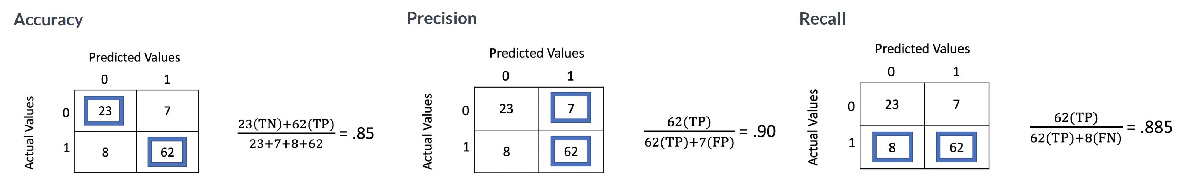

In [23]:
#vídeo

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

plot_3('accuracy', 'precision', 'recall', wspace=0.05)

Exercício 10

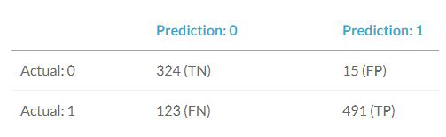

The overall accuracy is  0.86
The precision is  0.97
The recall is  0.80

In this case, a true positive is a picture of an actual broken arm that was also predicted to be broken. Doctors 
are okay with a few additional false positives (predicted broken, not actually broken), as long as you don't miss anyone
who needs immediate medical attention.


In [24]:
# Confusion matrices

# Confusion matrices are a great way to start exploring your model's accuracy. They provide the values needed to calculate 
# a wide range of metrics, including sensitivity, specificity, and the F1-score.
# You have built a classification model to predict if a person has a broken arm based on an X-ray image. 
# On the testing set, you have the following confusion matrix:
plot_1('conf_mat_test')



# Calculate and print the accuracy
accuracy = (324 + 491) / (953)
print("The overall accuracy is {0: 0.2f}".format(accuracy))

# Calculate and print the precision
precision = (491) / (491 + 15)
print("The precision is {0: 0.2f}".format(precision))

# Calculate and print the recall
recall = (491) / (491 + 123)
print("The recall is {0: 0.2f}\n".format(recall))

print("""In this case, a true positive is a picture of an actual broken arm that was also predicted to be broken. Doctors 
are okay with a few additional false positives (predicted broken, not actually broken), as long as you don't miss anyone
who needs immediate medical attention.""")

Exercício 11

In [25]:
# Confusion matrices, again

df = pd.read_csv(data_folder + "tic-tac-toe.csv")

for i in df.columns:
    df[i] = LabelEncoder().fit_transform(df[i])

X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1111)
rfc = RandomForestClassifier(random_state=1111)
rfc.fit(X_train, y_train)
######################################################################################################

from sklearn.metrics import confusion_matrix

# Create predictions
test_predictions = rfc.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is: {}".format(cm[1, 1]))


[[ 67  14]
 [  0 159]]
The number of true positives is: 159


Exercício 12

In [26]:
# Precision vs. recall

from sklearn.metrics import precision_score

# Create precision or recall score based on the metric you imported
score = precision_score(y_test, test_predictions)

# Print the final result
print("The precision value is {0:.2f}".format(score))

print("""\nPrecision is the correct metric here. Sore-losers can't stand losing when they are certain they will win!
For that reason, our model needs to be as precise as possible. With a precision of only 79%, you may need to try some other
modeling techniques to improve this score.""")

The precision value is 0.92

Precision is the correct metric here. Sore-losers can't stand losing when they are certain they will win!
For that reason, our model needs to be as precise as possible. With a precision of only 79%, you may need to try some other
modeling techniques to improve this score.


#### Exercício 13 - The bias-variance tradeoff

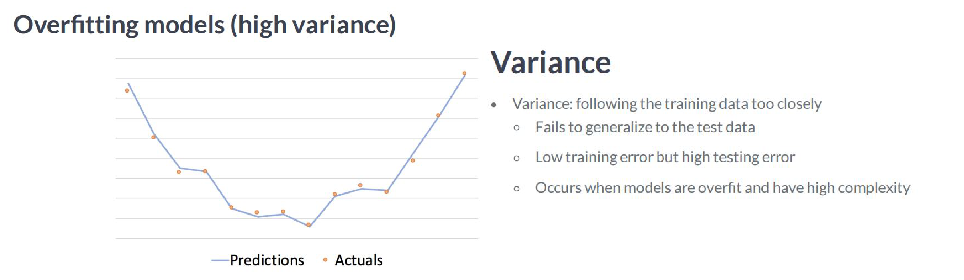

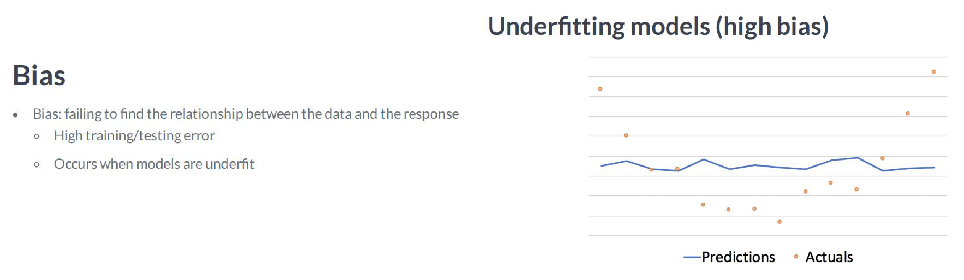

In [27]:
#vídeo

plot_2('overfitting', 'variance')
plot_2('bias', 'underfitting')

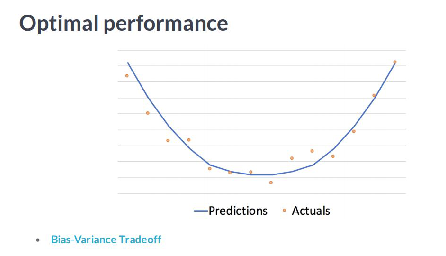

Only you can prevent overfitting.


In [28]:
plot_1('optimal_performance')
print("Only you can prevent overfitting.")

Exercício 14

The training error is 3.36
The testing error is 9.67

The training error is 3.54
The testing error is 10.28

The training error is 3.44
The testing error is 10.01



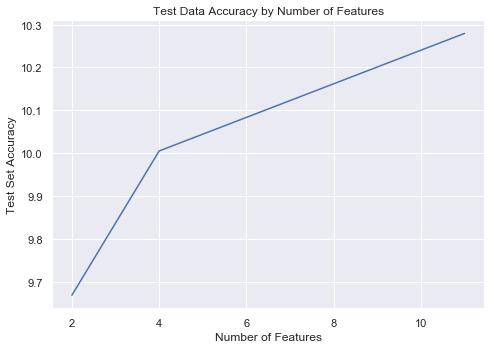

In [29]:
# Error due to under/over-fitting

df = pd.read_csv(data_folder + "candy-data.csv")
X = df.drop(['winpercent', 'competitorname'], axis=1)
y = df['winpercent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1111)
##################################################################################################

x_s = []
y_s = []

# Create the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=2)
rfr.fit(X_train, y_train)

# Print the training and testing accuracies 
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}\n'.format(mae(y_test, rfr.predict(X_test))))
x_s.append(rfr.max_features)
y_s.append(mae(y_test, rfr.predict(X_test)))

# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=11)
rfr.fit(X_train, y_train)

# Print the training and testing accuracies 
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}\n'.format(mae(y_test, rfr.predict(X_test))))
x_s.append(rfr.max_features)
y_s.append(mae(y_test, rfr.predict(X_test)))

# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=4)
rfr.fit(X_train, y_train)

# Print the training and testing accuracies 
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}\n'.format(mae(y_test, rfr.predict(X_test))))
x_s.append(rfr.max_features)
y_s.append(mae(y_test, rfr.predict(X_test)))

sns.lineplot(x=x_s, y=y_s)
plt.title('Test Data Accuracy by Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Test Set Accuracy')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 15

In [30]:
# Am I underfitting?

df = pd.read_csv(data_folder + "tic-tac-toe.csv")
for i in df.columns:
    df[i] = LabelEncoder().fit_transform(df[i])

X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1111)
#########################################################################################################

from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:
    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train)
    # Create predictions for the X_train and X_test datasets.
    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)
    # Append the accuracy score for the test and train predictions.
    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))


The training scores were: [0.93, 0.93, 0.99, 0.98, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.72, 0.71, 0.82, 0.82, 0.88, 0.9, 0.93, 0.94]


# Chapter 3 - Cross Validation

#### Exercício 1 - The problems with holdout sets

In [31]:
#vídeo

# The split matters  --> impact on results of 12% for example (different samples)
# solution: cross-validation

Exercício 2

In [32]:
# Two samples

# Create two different samples of 200 observations 
sample1 = tic_tac_toe.sample(200, random_state=1111)
sample2 = tic_tac_toe.sample(200, random_state=1171)

# Print the number of common observations 
print(len([index for index in sample1.index if index in sample2.index]), "\n")

# Print the number of observations in the Class column for both samples 
print(sample1['Class'].value_counts(), "\n")
print(sample2['Class'].value_counts())


# Notice that there are a varying number of positive observations for both sample test sets. Sometimes creating a single 
# test holdout sample is not enough to achieve the high levels of model validation you want. You need to use something more 
# robust.

40 

positive    134
negative     66
Name: Class, dtype: int64 

positive    123
negative     77
Name: Class, dtype: int64


Exercício 3

In [33]:
# Potential problems

# Which of the following statements are TRUE regarding potential problems with holdout samples:

# A: Using different data splitting methods may lead to varying data in the final holdout samples.
# B: If you have limited data, your holdout accuracy may be misleading.
# C: There are no problems. Creating a single train and test sample is the only way to validate models.
# D: You shouldn't use holdout samples with limited data because you are limiting the potential training data.

print("A & B")

A & B


#### Exercício 4 - Cross-validation

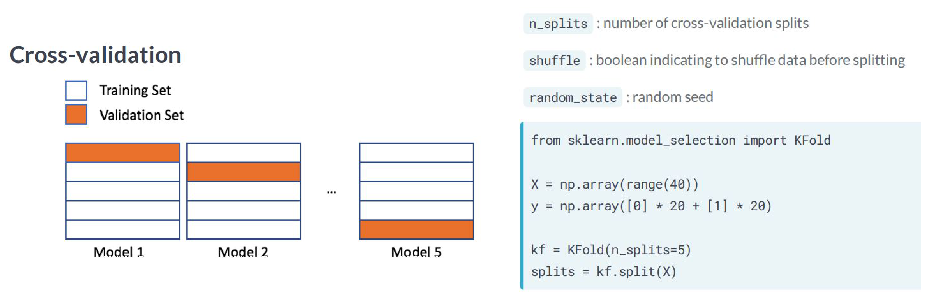

32 8
32 8
32 8
32 8
32 8
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] [32 33 34 35 36 37 38 39]
nan


C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
#vídeo

plot_2('cv', 'n_splits')

from sklearn.model_selection import KFold

# example
X = np.array(range(40)) # X variable: from 1 to 39
y = np.array([0] * 20 + [1] * 20)  # classification ex: 1's and 0's

kf = KFold(n_splits=5)

splits = kf.split(X)

# it will just split between 1/5 for 'testing' and 4/5 for 'training': in this case 1/5 = 8 and obviously 4/5 = 32
for train_index, test_index in splits:
    print(len(train_index), len(test_index))

# Print one of the index sets: (the last one)
print(train_index, test_index)

#######################################

rfr = RandomForestRegressor(n_estimators=25, random_state=1111)
errors = []
for train_index, val_index in splits:
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    
    rfr.fit(X_train, y_train)
    predictions = rfr.predict(X_test)
    errors.append(accuracy_score(y_val, predictions))

print(np.mean(errors))

Exercício 5

In [35]:
# scikit-learn's KFold()

df = pd.read_csv(data_folder + "candy-data.csv")
X = df.drop(['winpercent', 'competitorname'], axis=1)
y = df['winpercent']
##########################################################################################

from sklearn.model_selection import KFold

# Use KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

# Create splits
splits = kf.split(X)

# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: %s" % len(train_index))
    print("Number of validation indices: %s" % len(val_index))


Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17


Exercício 6

In [36]:
# Using KFold indices

# n sei porquê mas tenho q fazer isto
splits = kf.split(X)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)

# Access the training and validation indices of splits
for train_index, val_index in splits:
    # Setup the training and validation data
    X_train, y_train = X.iloc[train_index], y[train_index]
    X_val, y_val = X.iloc[val_index], y[val_index]
    # Fit the random forest model
    rfc.fit(X_train, y_train)
    # Make predictions, and print the accuracy
    predictions = rfc.predict(X_val)
    print("Split accuracy: " + str(mean_squared_error(y_val, predictions)))


Split accuracy: 151.5028145199104
Split accuracy: 173.4624060357644
Split accuracy: 132.7340977072911
Split accuracy: 81.50364942339418
Split accuracy: 217.17904656079338


#### Exercício 7 - sklearn cross_val_score()

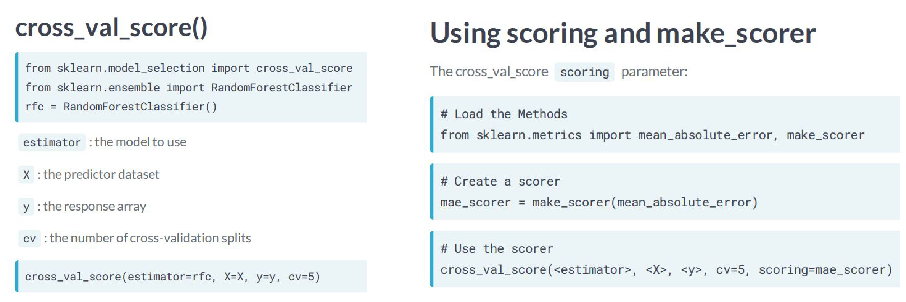

In [37]:
#vídeo

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

plot_2('cross_val_score', 'make_scorer')

Exercício 8

In [38]:
# scikit-learn's methods

# Instruction 1: Load the cross-validation method
from sklearn.model_selection import cross_val_score

# Instruction 2: Load the random forest regression model
from sklearn.ensemble import RandomForestRegressor

# Instruction 3: Load the mean squared error method
# Instruction 4: Load the function for creating a scorer
from sklearn.metrics import mean_squared_error, make_scorer


Exercício 9

In [39]:
# Implement cross_val_score()

df = pd.read_csv(data_folder + "candy-data.csv")
X = df.drop(['winpercent', 'competitorname'], axis=1)
y = df['winpercent']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111)
####################################################################################################

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)
mse = make_scorer(mean_squared_error)

# Set up cross_val_score
cv = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10, scoring=mse)

# Print the mean error
print(cv.mean())

print("""\nYou now have a baseline score to build on. If you decide to build additional models or try new techniques, you
should try to get an error lower than {}. Lower errors indicate that your popularity predictions are improving.""".format(
round(cv.mean(), 2)))

142.24081699887202

You now have a baseline score to build on. If you decide to build additional models or try new techniques, you
should try to get an error lower than 142.24. Lower errors indicate that your popularity predictions are improving.


#### Exercício 10 - Leave-one-out-cross-validation (LOOCV)

Leave-one-out-cross-validation: 
every single point will be used in the validation set, completely/only by itself.
 
number of cross-validations = X.shape[0]


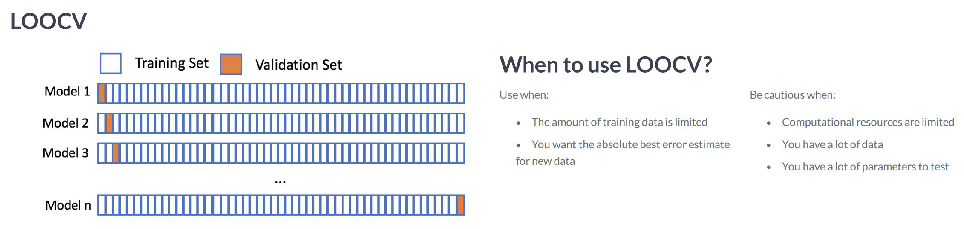

CV results:
 [6.90543183e-01 6.92920425e+02 1.11787314e+02 2.30869627e+02
 1.46528984e+02 2.55470743e+02 1.76068084e+02 2.18034723e+02
 5.47226985e-01 9.27087887e+01 6.44558479e+02 9.81079686e+01
 6.13625697e+02 3.49029728e-01 2.81303652e-01 8.27226816e+01
 3.14097753e+00 3.06427865e+00 1.71765407e+02 3.69309107e+01
 1.22920270e+01 1.20663383e+02 1.79614566e+02 2.38034036e+01
 2.00498747e+00 8.86263498e+00 2.90797904e+02 1.00674708e+02
 5.52211032e+02 5.09115540e+00 2.32292865e+01 1.03227747e+02
 4.06608367e+00 9.36373415e+00 6.52522271e+00 2.25397399e+00
 1.55018596e+02 5.54894721e+00 1.10063538e+01 1.38492996e+02
 6.96092513e+00 1.15460655e+02 1.44391558e+02 2.63546523e+01
 4.77070072e+02 9.37687348e+01 1.44636065e+02 1.93501864e+01
 1.81247894e+00 1.26072965e+01 1.12332436e+02 9.05971802e+02
 1.83062278e+02 2.48601273e+02 1.19549978e-01 6.21624031e+00
 2.89602861e+01 8.14911516e+01 4.76245441e+01 3.23579597e+02
 1.24708504e+02 2.56965968e+00 3.95071710e+02 5.76635297e+00
 4.68033939

In [40]:
#vídeo

print("""Leave-one-out-cross-validation: 
every single point will be used in the validation set, completely/only by itself.\n """)

print("number of cross-validations = X.shape[0]")

plot_2('loocv', 'when_loocv', wspace=0.05)

# LOOCV Example
n = X.shape[0]
mse = make_scorer(mean_squared_error)

cv_results = cross_val_score(estimator=rfc, X=X, y=y, scoring=mse, cv=n)

print("CV results:\n {}\n".format(cv_results))
print("CV results mean: {}".format(cv_results.mean()))

Exercício 11

In [41]:
# When to use LOOCV

# Which of the following are reasons you might NOT run LOOCV on the provided X dataset? The X data has been loaded for you
# to explore as you see fit.

# A: The X dataset has 122,624 data points, which might be computationally expensive and slow.
# B: You cannot run LOOCV on classification problems.
# C: You want to test different values for 15 different parameters.

print("A and C")


A and C


Exercício 12

In [42]:
# Leave-one-out-cross-validation

from sklearn.metrics import mean_absolute_error, make_scorer

# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

rfr = RandomForestRegressor(n_estimators=15, random_state=1111)

# Implement LOOCV
scores = cross_val_score(estimator=rfr, X=X, y=y, cv=X.shape[0], scoring=mae_scorer)  # leave-one-ou-cross-validation

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))


The mean of the errors is: 9.464989603398694.
The standard deviation of the errors is: 7.265762094853885.


# Chapter 4 - Selecting the best model with Hyperparameter tuning

#### Exercício 1 - Introduction to hyperparameter tuning

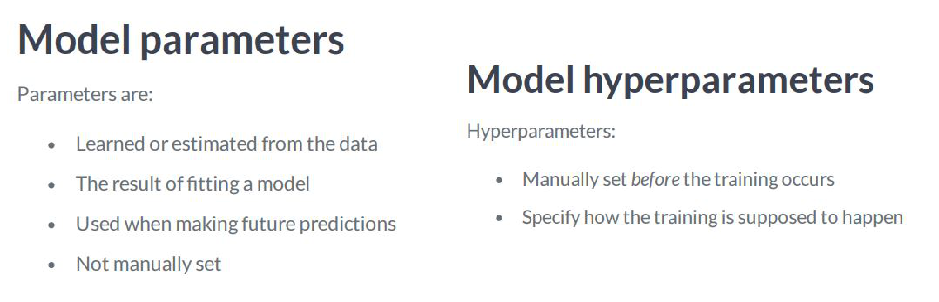

[19.74806698  9.42232207  2.22448136 10.07068847  0.8043306   8.91896981
 -6.1653265   0.44154009 -0.85449954  9.08676286 -5.92836143] 
 34.533978414687695


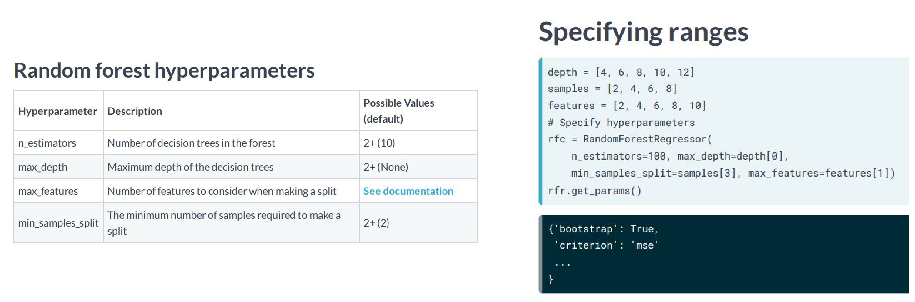

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}

GENERAL GUIDELINES:
 - start with the basics
 - read through the documentation
 - test practical ranges


In [43]:
#vídeo

plot_2('model_params', 'model_hyp')

# Linear regression parameters
from sklearn.linear_model import LinearRegression

# Parameters do not exist before the model is fit
lr = LinearRegression()
# print(lr.coef_, lr.intercept_)   # -------------->  AttributeError: 'LinearRegression' object has no attribute 'coef_'

# Parameters are created by fitting a model:
lr.fit(X, y)
print(lr.coef_, "\n", lr.intercept_)

##################################################################################################################

plot_2('rf_hyp', 'ranges_spec')
print(rfr.get_params())
print("""\nGENERAL GUIDELINES:
 - start with the basics
 - read through the documentation
 - test practical ranges""")

Exercício 2

In [44]:
# Creating Hyperparameters

# Review the parameters of rfr
print(rfr.get_params())

# Maximum Depth
max_depth = [4, 8, 12]

# Minimum samples for a split
min_samples_split = [2, 5, 10]

# Max features 
max_features = [4, 6, 8, 10]


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


Exercício 3

In [45]:
# Running a model using ranges

from sklearn.ensemble import RandomForestRegressor
import random

# Fill in rfr using your variables
rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=random.choice(max_depth),
    min_samples_split=random.choice(min_samples_split),
    max_features=random.choice(max_features))

# Print out the parameters
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Exercício 4 - RandomizedSearchCV

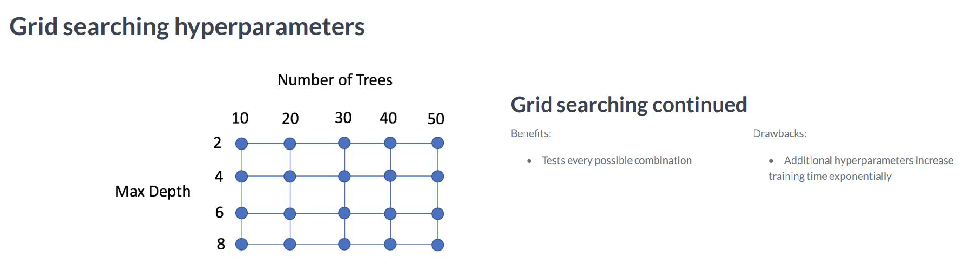

In [46]:
#vídeo
plot_2('grid_search', 'grid_search_2', wspace=0.1)

Better methods:
 - Random searching (https://analyticsindiamag.com/why-is-random-search-better-than-grid-search-for-machine-learning/)
 - Bayesian optimization (https://towardsdatascience.com/an-introductory-example-of-bayesian-optimization-in-python-with-hyperopt-aae40fff4ff0)

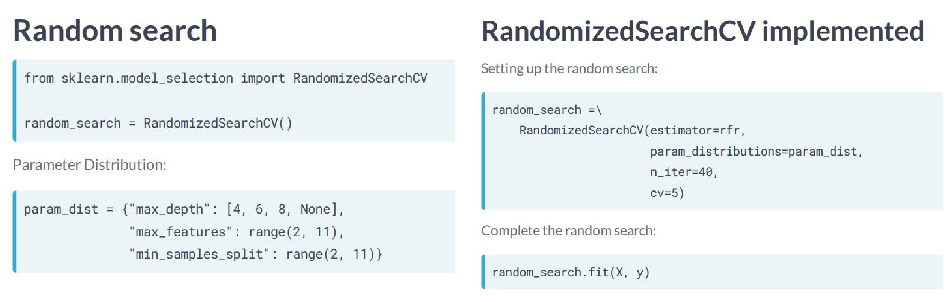

- We cannot do hyperparameter tuning without understanding model validation.
- Model validation allows us to compare multiple models and parameter sets.


In [47]:
from sklearn.model_selection import RandomizedSearchCV

plot_2('random_search', 'random_search_2')
print("""- We cannot do hyperparameter tuning without understanding model validation.
- Model validation allows us to compare multiple models and parameter sets.""")

Exercício 5

In [48]:
# Preparing for RandomizedSearch

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Finish the dictionary by adding the max_depth parameter
param_dist = {"max_depth": [2, 4, 6, 8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16]}

# Create a random forest regression model
rfr = RandomForestRegressor(n_estimators=10, random_state=1111)

# Create a scorer to use (use the mean squared error)
scorer = make_scorer(mean_squared_error)


Exercício 6

In [49]:
# Implementing RandomizedSearchCV

# Import the method for random search
from sklearn.model_selection import RandomizedSearchCV

# Build a random search using param_dist, rfr, and scorer
random_search = RandomizedSearchCV(estimator=rfr,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   scoring=scorer)

# Although it takes a lot of steps, hyperparameter tuning with random search is well worth it and can improve the accuracy
# of your models. Plus, you are already using cross-validation to validate your best model.

#### Exercício 7 - Selecting your final model

Best score: 157.10958128701105

Best Parameters: {'min_samples_split': 16, 'max_features': 2, 'max_depth': 2}

Best Estimator: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=16, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=1111, verbose=0, warm_start=False)

OTHER ATTRIBUTES:

Mean Test Score: (10 iterations) [135.0117801  134.02988525 143.30620263 136.65620271 139.61373392
 157.10958129 142.16075709 153.2468702  132.82148424 134.74469784]

Selected Parameters: [{'min_samples_split': 16, 'max_features': 8, 'max_depth': 2}, {'min_samples_split': 4, 'max_features': 2, 'max_depth': 4}, {'min_samples_split': 2, 'max_features': 8, 'max_dep

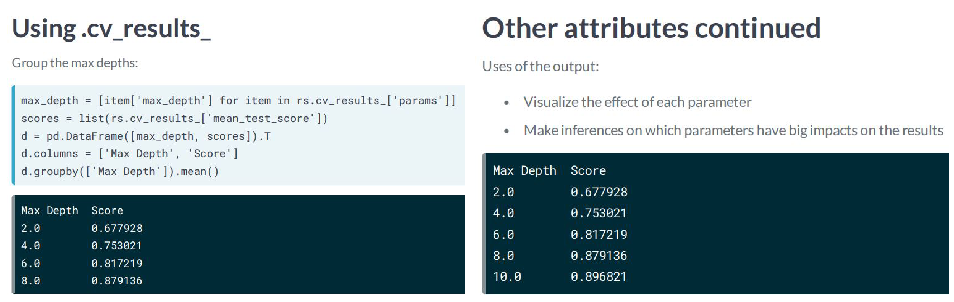

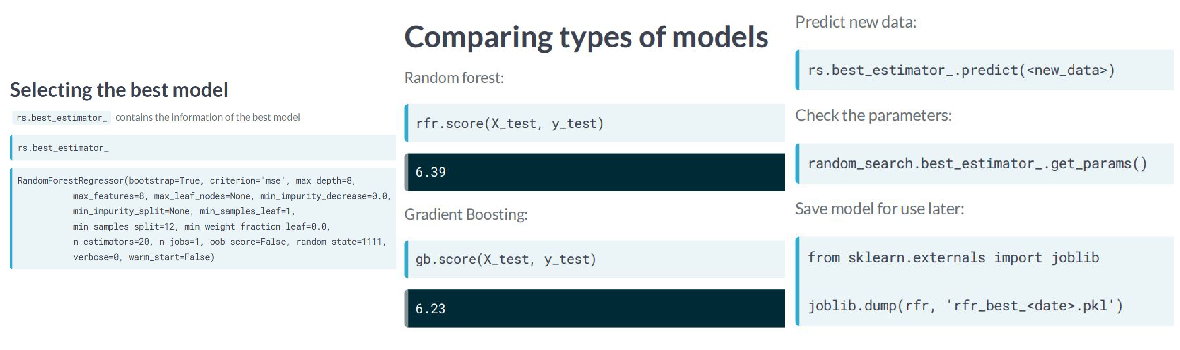

In [50]:
#vídeo

random_search.fit(X, y)

print("Best score: {}\n".format(random_search.best_score_))
print("Best Parameters: {}\n".format(random_search.best_params_))
print("Best Estimator: {}\n".format(random_search.best_estimator_))

print("OTHER ATTRIBUTES:\n")
print("Mean Test Score: ({} iterations) {}\n".format(random_search.n_iter, random_search.cv_results_['mean_test_score']))
print("Selected Parameters: {}".format(random_search.cv_results_['params']))

plot_2('cv_results_', 'cv_results_2')
print("==================================================================================================================")

plot_3('best_model', 'comparing_models', 'new_data')

# save model for later use
from sklearn.externals import joblib


Exercício 8

In [51]:
# Best classification accuracy

# You are in a competition at work to build the best model for predicting the winner of a Tic-Tac-Toe game. 
# You already ran a random search and saved the results of the most accurate model to rs.

rs = random_search    # ---> vou assumir esta parametrização

# Which parameter set produces the best classification accuracy?

print(rs.best_params_)


{'min_samples_split': 16, 'max_features': 2, 'max_depth': 2}


Exercício 9

In [52]:
# Selecting the best precision model

df = pd.read_csv(data_folder + "tic-tac-toe.csv")
for i in df.columns:
    df[i] = LabelEncoder().fit_transform(df[i])
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1111)
rfc = RandomForestClassifier()

param_dist = {'max_depth': range(2, 12, 2), 
              'min_samples_split': range(2, 12, 2), 
              'n_estimators': [10, 25, 50]}

###################################################################################################################

from sklearn.metrics import precision_score, make_scorer

# Create a precision scorer
precision = make_scorer(precision_score)

# Finalize the random search
rs = RandomizedSearchCV(estimator=rfc, 
                        param_distributions=param_dist,
                        scoring = precision,
                        cv=5, n_iter=10, 
                        random_state=1111)

rs.fit(X, y)

# print the mean test scores:
print('The accuracy for each run was: {}.'.format(rs.cv_results_['mean_test_score']))

# print the best model score:
print('\nThe best accuracy for a single model was: {}'.format(rs.best_score_))

# meu
print("\nThe best parameters: {}".format(rs.best_params_))
print("The best model: {}".format(rs.best_estimator_))

The accuracy for each run was: [0.85006232 0.75356919 0.66807684 0.87046802 0.85570341 0.83350362
 0.68094124 0.81960982 0.86290537 0.89070788].

The best accuracy for a single model was: 0.890707878494138

The best parameters: {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 10}
The best model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


#### Exercício 10 - end

In [53]:
#vídeo

# Fim